# Characterization of airlines based on features

## Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

## Reading data from file

In [2]:
flights = pd.read_csv("flights.txt", sep="|")

In [3]:
flights.shape

(1191805, 31)

In [4]:
flights['FLIGHTDATE'] = pd.to_datetime(flights['FLIGHTDATE'], format='%Y%m%d')

In [5]:
flights.dtypes

TRANSACTIONID                 int64
FLIGHTDATE           datetime64[ns]
AIRLINECODE                  object
AIRLINENAME                  object
TAILNUM                      object
FLIGHTNUM                     int64
ORIGINAIRPORTCODE            object
ORIGAIRPORTNAME              object
ORIGINCITYNAME               object
ORIGINSTATE                  object
ORIGINSTATENAME              object
DESTAIRPORTCODE              object
DESTAIRPORTNAME              object
DESTCITYNAME                 object
DESTSTATE                    object
DESTSTATENAME                object
CRSDEPTIME                    int64
DEPTIME                     float64
DEPDELAY                    float64
TAXIOUT                     float64
WHEELSOFF                   float64
WHEELSON                    float64
TAXIIN                      float64
CRSARRTIME                    int64
ARRTIME                     float64
ARRDELAY                    float64
CRSELAPSEDTIME              float64
ACTUALELAPSEDTIME           

In [6]:
flights.iloc[:,:16].head()

,TRANSACTIONID,FLIGHTDATE,AIRLINECODE,AIRLINENAME,TAILNUM,FLIGHTNUM,ORIGINAIRPORTCODE,ORIGAIRPORTNAME,ORIGINCITYNAME,ORIGINSTATE,ORIGINSTATENAME,DESTAIRPORTCODE,DESTAIRPORTNAME,DESTCITYNAME,DESTSTATE,DESTSTATENAME
0,54548800,2002-01-01,WN,Southwest Airlines Co.: WN,N103@@,1425,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,New Mexico,DAL,DallasTX: Dallas Love Field,Dallas,TX,Texas
1,55872300,2002-01-01,CO,Continental Air Lines Inc.: CO,N83872,150,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,New Mexico,IAH,HoustonTX: George Bush Intercontinental/Houston,Houston,TX,Texas
2,54388800,2002-01-01,WN,Southwest Airlines Co.: WN,N334@@,249,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,New Mexico,MCI,Kansas CityMO: Kansas City International,Kansas City,MO,Missouri
3,54486500,2002-01-01,WN,Southwest Airlines Co.: WN,N699@@,902,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,New Mexico,LAS,Las VegasNV: McCarran International,Las Vegas,NV,Nevada
4,55878700,2002-01-03,CO,Continental Air Lines Inc.: CO,N58606,234,ABQ,AlbuquerqueNM: Albuquerque International Sunport,Albuquerque,NM,New Mexico,IAH,HoustonTX: George Bush Intercontinental/Houston,Houston,TX,Texas


In [7]:
flights.iloc[:,16:]

,CRSDEPTIME,DEPTIME,DEPDELAY,TAXIOUT,WHEELSOFF,WHEELSON,TAXIIN,CRSARRTIME,ARRTIME,ARRDELAY,CRSELAPSEDTIME,ACTUALELAPSEDTIME,CANCELLED,DIVERTED,DISTANCE
0,1425,1425.0,0.0,8.0,1433.0,1648.0,4.0,1655,1652.0,-3.0,90.0,87.0,F,False,580 miles
1,1130,1136.0,6.0,12.0,1148.0,1419.0,16.0,1426,1435.0,9.0,116.0,119.0,False,F,744 miles
2,1215,1338.0,83.0,7.0,1345.0,1618.0,2.0,1500,1620.0,80.0,105.0,102.0,F,False,718 miles
3,1925,1925.0,0.0,5.0,1930.0,1947.0,1.0,1950,1948.0,-2.0,85.0,83.0,0,0,487 miles
4,1455,1453.0,-2.0,11.0,1504.0,1742.0,5.0,1750,1747.0,-3.0,115.0,114.0,F,False,744 miles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191800,1357,1348.0,-9.0,22.0,1410.0,1500.0,3.0,1523,1503.0,-20.0,146.0,135.0,0,0,721 miles
1191801,2150,2147.0,-3.0,23.0,2210.0,2307.0,10.0,2321,2317.0,-4.0,151.0,150.0,False,F,731 miles
1191802,1617,1617.0,0.0,18.0,1635.0,1728.0,9.0,1750,1737.0,-13.0,153.0,140.0,F,False,731 miles
1191803,1516,1514.0,-2.0,21.0,1535.0,1651.0,4.0,1658,1655.0,-3.0,102.0,101.0,False,F,508 miles


In [8]:
flights.columns

Index(['TRANSACTIONID', 'FLIGHTDATE', 'AIRLINECODE', 'AIRLINENAME', 'TAILNUM',
       'FLIGHTNUM', 'ORIGINAIRPORTCODE', 'ORIGAIRPORTNAME', 'ORIGINCITYNAME',
       'ORIGINSTATE', 'ORIGINSTATENAME', 'DESTAIRPORTCODE', 'DESTAIRPORTNAME',
       'DESTCITYNAME', 'DESTSTATE', 'DESTSTATENAME', 'CRSDEPTIME', 'DEPTIME',
       'DEPDELAY', 'TAXIOUT', 'WHEELSOFF', 'WHEELSON', 'TAXIIN', 'CRSARRTIME',
       'ARRTIME', 'ARRDELAY', 'CRSELAPSEDTIME', 'ACTUALELAPSEDTIME',
       'CANCELLED', 'DIVERTED', 'DISTANCE'],
      dtype='object')

## Manipulating and organizing data

In [9]:
flights['TOTALDELAY'] = flights['DEPDELAY'] + flights['ARRDELAY']

In [10]:
flights['TOTALTAXITIME'] = flights['TAXIIN'] + flights['TAXIOUT']

In [11]:
flights['DISTANCEMILES'] = pd.DataFrame(flights['DISTANCE'].str.split().tolist())[0].astype('float64')

In [12]:
flights['VELOCITYMPH'] = flights['DISTANCEMILES'] / (flights['ACTUALELAPSEDTIME']/60)

In [13]:
flights['CANCELLED'] = flights['CANCELLED'].str.replace("False","0").replace("F","0").replace("True","1").replace("T","1").astype("int64")

### Selecting features and grouping data by airlines

In [14]:
columns = ['AIRLINENAME','TOTALDELAY','TOTALTAXITIME','VELOCITYMPH','CANCELLED']

In [15]:
flights_airlines = flights.loc[:,columns]

In [16]:
flights_airlines.dtypes

AIRLINENAME       object
TOTALDELAY       float64
TOTALTAXITIME    float64
VELOCITYMPH      float64
CANCELLED          int64
dtype: object

#### Cancellation rate

In [17]:
cancelled = pd.DataFrame(flights_airlines.groupby("CANCELLED")['AIRLINENAME'].value_counts()[1])
completed = pd.DataFrame(flights_airlines.groupby("CANCELLED")['AIRLINENAME'].value_counts()[0])

In [18]:
cancelled = cancelled.rename(columns={'AIRLINENAME':'CANCELLED'}).reset_index()
completed = completed.rename(columns={'AIRLINENAME':'COMPLETED'}).reset_index()

In [19]:
cancelled.head()

,AIRLINENAME,CANCELLED
0,American Airlines Inc.: AA,3624
1,US Airways Inc.: US (Merged with America West ...,3399
2,United Air Lines Inc.: UA,3316
3,Delta Air Lines Inc.: DL,3303
4,Northwest Airlines Inc.: NW,2795


In [20]:
completed.head()

,AIRLINENAME,COMPLETED
0,Southwest Airlines Co.: WN,187435
1,Delta Air Lines Inc.: DL,163298
2,American Airlines Inc.: AA,136158
3,United Air Lines Inc.: UA,118488
4,US Airways Inc.: US (Merged with America West ...,114862


In [21]:
c_rate = cancelled.merge(completed, on="AIRLINENAME")
c_rate['CANCELLATION RATE'] = c_rate['CANCELLED'] / (c_rate['CANCELLED'] + c_rate['COMPLETED'])

In [22]:
c_rate.head()

,AIRLINENAME,CANCELLED,COMPLETED,CANCELLATION RATE
0,American Airlines Inc.: AA,3624,136158,0.025926
1,US Airways Inc.: US (Merged with America West ...,3399,114862,0.028742
2,United Air Lines Inc.: UA,3316,118488,0.027224
3,Delta Air Lines Inc.: DL,3303,163298,0.019826
4,Northwest Airlines Inc.: NW,2795,66401,0.040393


In [23]:
c_rate.shape

(26, 4)

#### Obteining Mean Data

In [24]:
flights_airlines = flights_airlines.groupby('AIRLINENAME').agg({'TOTALDELAY':np.mean,'TOTALTAXITIME':np.mean,'VELOCITYMPH':np.mean})

In [25]:
flights_airlines.reset_index(inplace=True)

In [26]:
flights_airlines.head()

,AIRLINENAME,TOTALDELAY,TOTALTAXITIME,VELOCITYMPH
0,ATA Airlines d/b/a ATA: TZ,8.926534,25.062054,372.300702
1,AirTran Airways Corporation: FL,7.135774,22.518651,333.657270
2,Alaska Airlines Inc.: AS,7.083628,18.470044,354.610812
3,Aloha Airlines Inc.: AQ,2.056818,10.756494,222.482146
4,America West Airlines Inc.: HP (Merged with US...,15.274335,20.433545,332.995769


In [27]:
flights_airlines.shape

(26, 4)

#### Adding cancellation rate & renaming columns

In [28]:
flights_airlines = flights_airlines.merge(c_rate[['AIRLINENAME','CANCELLATION RATE']], on="AIRLINENAME", how="left")

In [29]:
flights_airlines.rename(columns={'TOTALDELAY':'AVG DELAY TIME', 'TOTALTAXITIME':'AVG TAXI TIME'}, inplace=True)

In [30]:
flights_airlines.head()

,AIRLINENAME,AVG DELAY TIME,AVG TAXI TIME,VELOCITYMPH,CANCELLATION RATE
0,ATA Airlines d/b/a ATA: TZ,8.926534,25.062054,372.300702,0.011972
1,AirTran Airways Corporation: FL,7.135774,22.518651,333.657270,0.011662
2,Alaska Airlines Inc.: AS,7.083628,18.470044,354.610812,0.021652
3,Aloha Airlines Inc.: AQ,2.056818,10.756494,222.482146,0.044961
4,America West Airlines Inc.: HP (Merged with US...,15.274335,20.433545,332.995769,0.021223


In [31]:
flights_airlines.shape

(26, 5)

## Input data

In [32]:
X = flights_airlines.iloc[:,1:]

In [33]:
X.head()

,AVG DELAY TIME,AVG TAXI TIME,VELOCITYMPH,CANCELLATION RATE
0,8.926534,25.062054,372.300702,0.011972
1,7.135774,22.518651,333.657270,0.011662
2,7.083628,18.470044,354.610812,0.021652
3,2.056818,10.756494,222.482146,0.044961
4,15.274335,20.433545,332.995769,0.021223


### Pearson correlation

In [34]:
X.corr()

,AVG DELAY TIME,AVG TAXI TIME,VELOCITYMPH,CANCELLATION RATE
AVG DELAY TIME,1.000000,0.418180,0.320212,0.093322
AVG TAXI TIME,0.418180,1.000000,0.172290,0.017236
VELOCITYMPH,0.320212,0.172290,1.000000,-0.483440
CANCELLATION RATE,0.093322,0.017236,-0.483440,1.000000


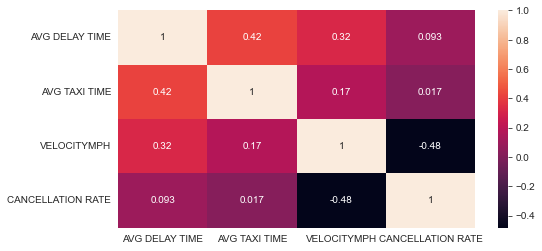

In [35]:
fig,ax = plt.subplots(figsize=(8, 4))
_=sns.heatmap(X.corr(), ax=ax, annot=True)

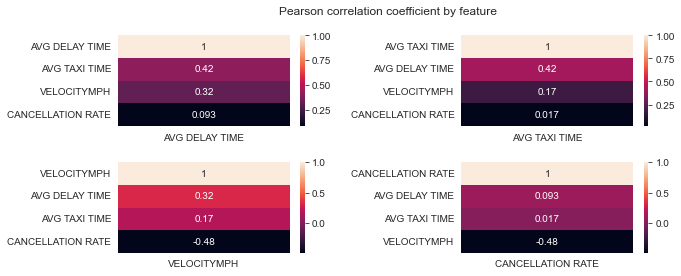

In [36]:
fig,axs = plt.subplots(2,2,figsize=(10,4))
DT = X.corr()[['AVG DELAY TIME']].sort_values(by='AVG DELAY TIME', ascending=False)
TT = X.corr()[['AVG TAXI TIME']].sort_values(by='AVG TAXI TIME', ascending=False)
V = X.corr()[['VELOCITYMPH']].sort_values(by='VELOCITYMPH', ascending=False)
CR = X.corr()[['CANCELLATION RATE']].sort_values(by='CANCELLATION RATE', ascending=False)
_=sns.heatmap(DT, ax=axs[0,0], annot=True)
_=sns.heatmap(TT, ax=axs[0,1], annot=True)
_=sns.heatmap(V, ax=axs[1,0], annot=True)
_=sns.heatmap(CR, ax=axs[1,1], annot=True)
plt.subplots_adjust(wspace=0.6, hspace=0.4)
_=plt.suptitle('Pearson correlation coefficient by feature')

### Normalizing data

In [37]:
sc = StandardScaler()

In [38]:
sc.fit(X)

StandardScaler()

In [39]:
X_norm = sc.transform(X)

In [40]:
X_norm.shape

(26, 4)

### K-Means

In [41]:
clusters = np.arange(1,11)
clusters

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [42]:
inertia = []
for k in clusters:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_norm)
    inertia.append(kmeans.inertia_)

In [43]:
eva = pd.DataFrame({"K": clusters, "Inertia": inertia})
eva

,K,Inertia
0,1,104.000000
1,2,75.626644
2,3,55.315181
3,4,46.901321
4,5,39.275097
5,6,31.199336
6,7,26.311353
7,8,19.063607
8,9,14.461340
9,10,12.225431


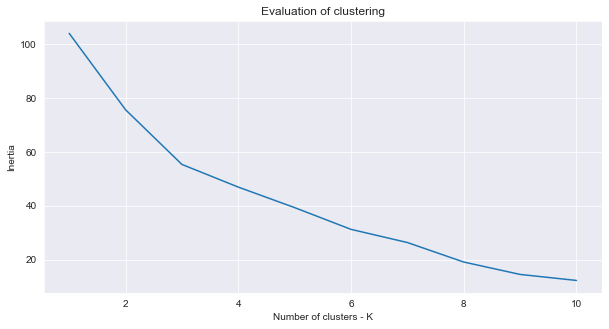

In [44]:
fig,ax = plt.subplots(figsize=(10,5))
_=sns.lineplot(data=eva, x="K", y="Inertia")
_=ax.set_xlabel("Number of clusters - K")
_=ax.set_title("Evaluation of clustering")

In [45]:
kmeans = KMeans(n_clusters=3, random_state=0)

In [46]:
kmeans.fit(X_norm)

KMeans(n_clusters=3, random_state=0)

In [47]:
kmeans.cluster_centers_

array([[ 1.14654143e-01,  3.85533235e-01, -7.26157629e-01,
         6.12613890e-01],
       [-2.05437325e+00, -2.11094269e+00, -1.65441837e+00,
         9.43252660e-02],
       [ 2.19042380e-01, -1.46001573e-03,  8.68966974e-01,
        -5.32877179e-01]])

In [48]:
flights_airlines['CLUSTER'] = kmeans.labels_

In [49]:
flights_airlines.head()

,AIRLINENAME,AVG DELAY TIME,AVG TAXI TIME,VELOCITYMPH,CANCELLATION RATE,CLUSTER
0,ATA Airlines d/b/a ATA: TZ,8.926534,25.062054,372.300702,0.011972,2
1,AirTran Airways Corporation: FL,7.135774,22.518651,333.657270,0.011662,2
2,Alaska Airlines Inc.: AS,7.083628,18.470044,354.610812,0.021652,2
3,Aloha Airlines Inc.: AQ,2.056818,10.756494,222.482146,0.044961,1
4,America West Airlines Inc.: HP (Merged with US...,15.274335,20.433545,332.995769,0.021223,2


### Plotting data in pairs

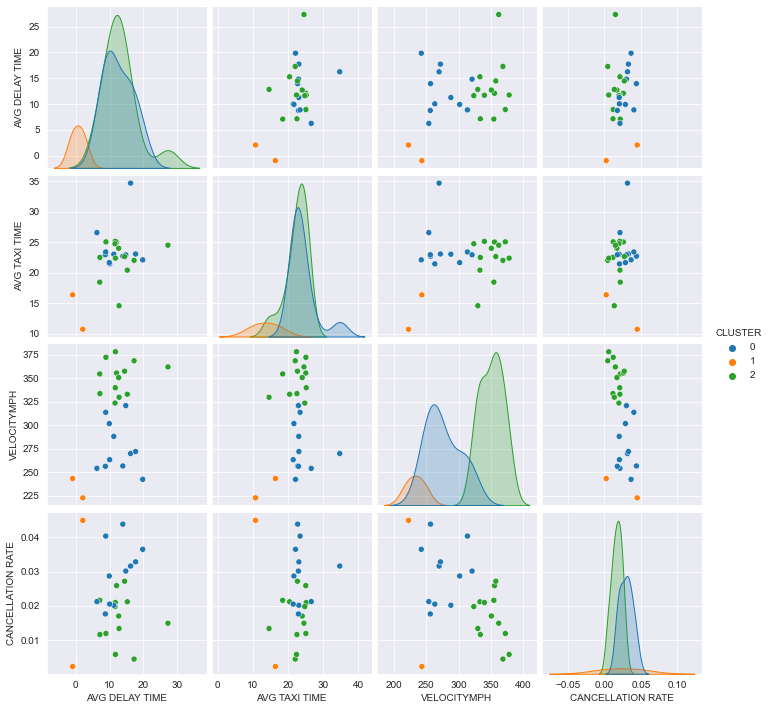

In [50]:
_=sns.pairplot(flights_airlines, hue='CLUSTER', palette="tab10")

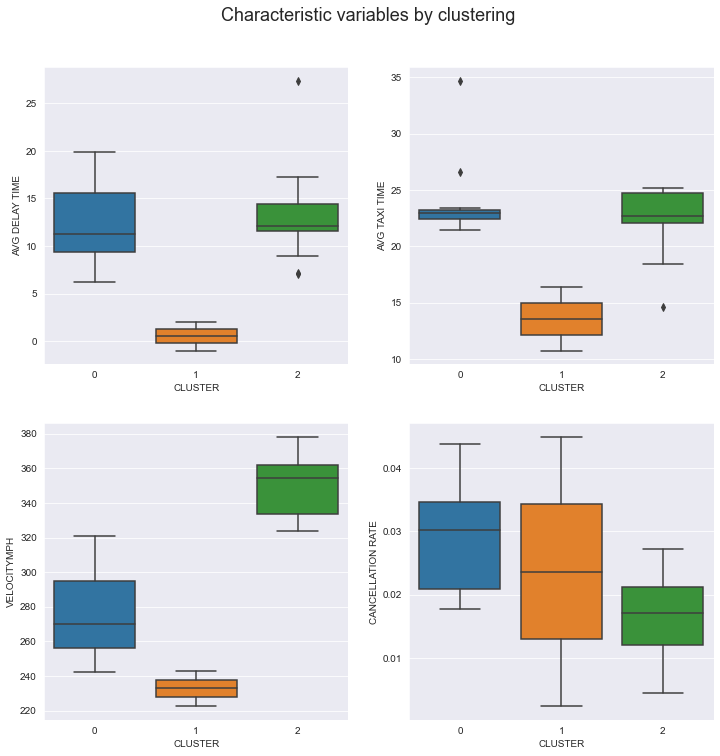

In [51]:
fig,axs = plt.subplots(2,2,figsize=(12,12))
_=sns.boxplot(data=flights_airlines, x="CLUSTER", y="AVG DELAY TIME", ax=axs[0,0])
_=sns.boxplot(data=flights_airlines, x="CLUSTER", y="AVG TAXI TIME", ax=axs[0,1])
_=sns.boxplot(data=flights_airlines, x="CLUSTER", y="VELOCITYMPH", ax=axs[1,0])
_=sns.boxplot(data=flights_airlines, x="CLUSTER", y="CANCELLATION RATE", ax=axs[1,1])
_=fig.suptitle("Characteristic variables by clustering", fontsize=18, y=0.95)

### Clustering
Cluster 0
- Most data is distributed by a higher range of delay time, the average is below cluster 1 (High times - Medium) (Status: Medium)
- Quite a few are concentrated for approximately 23 minutes in taxi time, however, most of the high data is found in cluster 1, and those are above average (Status: Bad)
- The speed has average values (Status: Medium)
- Most data is high for cancellation rate (High values) (Status: Bad)

Clister 1
- Data has low delay times (Low) (Status: Good)
- Data has low taxi times, good relation between taxi-in and taxi-out (Low) (Condition: Good)
- Data shows slower travel (Low) (Status: Bad)
- It has a very varied cancellation rate, but the median is in an intermediate state compared to the others (Status: Medium)

Cluster 2
- Most of the data is concentrated upwards, with longer delay times (Status: Bad)
- 50% of the data was below cluster 0, but above cluster 1 (State: Medium)
- High speeds, traveling in less time, faster (Condition: Good)
- They have lower cancellation rates in the number of flights made (Status: Good)

|Cluster|Remark|
|---|---|
|0|Airlines with medium-high delays, take-off and departure delays, and high cancellation rates (Not-outstanding Airlines)|
|1|Airlines with low overall delays and delays, slow travel, and low cancellation rate (Best Airlines)|
|2|Airlines with the longest delays but low take-off and departure times, and low cancellation rates (Average Airlines)|